In [34]:
#pip install mne
#import packages
import mne
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
raw = mne.io.read_raw_brainvision('own_group4.vhdr', eog= ('EOG1', 'EOG2'))
raw.load_data()
raw.set_montage('standard_1020', on_missing = 'ignore')

Extracting parameters from own_group4.vhdr...
Setting channel info structure...
Reading 0 ... 586859  =      0.000 ...   586.859 secs...


<RawBrainVision | own_group4.eeg, 32 x 586860 (586.9 s), ~143.3 MB, data loaded>

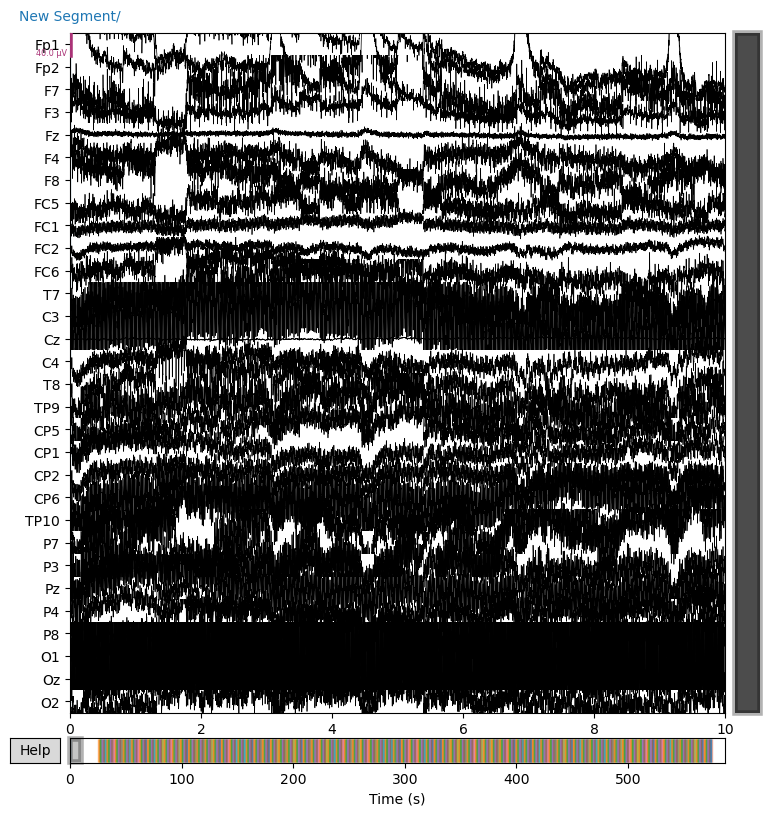

In [36]:
raw.pick_types(meg=False, eeg=True, stim=True)
raw.plot(n_channels = 32);

Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished


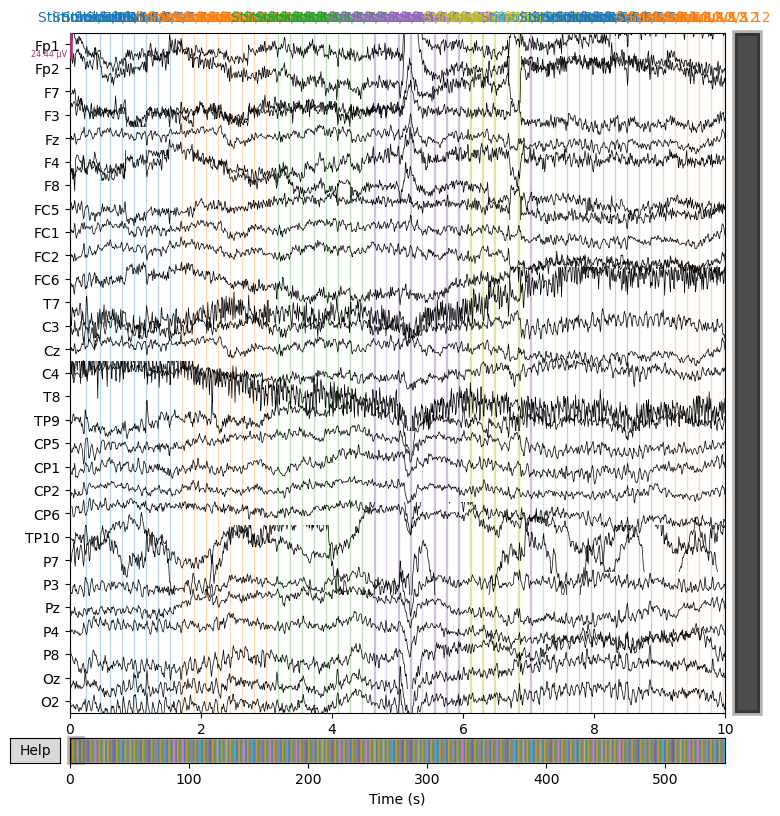

In [37]:
raw.info['bads'] = ['O1']
raw.crop(25, 575)

raw.set_eeg_reference(ref_channels='average', ch_type='eeg')
raw = raw.filter(0.1, 40)
raw.pick_types(meg=False, eeg=True, stim=True, exclude = 'bads')
raw.plot(scalings = "auto", n_channels = 32);

In [21]:
raw

<RawBrainVision | own_group4.eeg, 29 x 550001 (550.0 s), ~121.7 MB, data loaded>

In [38]:
reject = {'eeg': 150e-6}

In [39]:
events = mne.events_from_annotations(raw)[0]

Used Annotations descriptions: ['Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 25', 'Stimulus/S 26', 'Stimulus/S 27', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S125', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S225', 'Stimulus/S226', 'Stimulus/S227']


In [40]:
event_id = {'congruent/1': 11,
            'congruent/2': 12,
            'congruent/3': 13,
            'congruent/4': 14,
            'incongruent/Db': 22,
            'incongruent/Eb': 23,
            'incongruent/Gb': 25,
            'incongruent/Ab': 26,
            'incongruent/Bb': 27,
            'oddball/Db': 122,
            'oddball/Eb': 123,
            'oddball/Gb': 125,
            'oddball/Ab': 126,
            'oddball/Bb': 127,
            'Poddball/Db': 222,
            'Poddball/Eb': 223,
            'Poddball/Gb': 225,
            'Poddball/Ab': 226,
            'Poddball/Bb': 227,
              }

C:\Users\Mikkel Fischer\AppData\Local\Temp\ipykernel_20816\1821892803.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events, sfreq=250, first_samp=raw.first_samp, event_id=event_id);


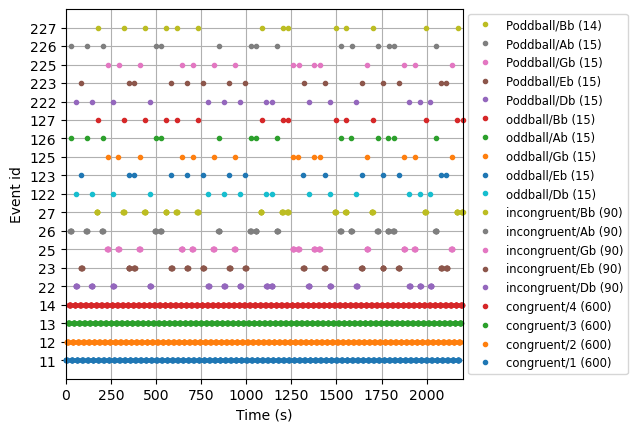

In [41]:
mne.viz.plot_events(events, sfreq=250, first_samp=raw.first_samp, event_id=event_id);

In [42]:
tmin, tmax = -0.2, 0.5

In [43]:
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

In [44]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks, proj=True,
                    baseline=(None, None), reject=reject, preload=True)

Not setting metadata
2999 matching events found
Setting baseline interval to [-0.2, 0.5] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2999 events and 701 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F8']


In [45]:
epochs_resampled = epochs.resample(250)

In [48]:
epochs_resampled

Number of events,2746
Events,Poddball/Ab: 15Poddball/Bb: 14Poddball/Db: 14Poddball/Eb: 15Poddball/Gb: 13congruent/1: 554congruent/2: 542congruent/3: 548congruent/4: 550incongruent/Ab: 87incongruent/Bb: 79incongruent/Db: 82incongruent/Eb: 88incongruent/Gb: 76oddball/Ab: 15oddball/Bb: 13oddball/Db: 13oddball/Eb: 15oddball/Gb: 13
Time range,-0.200 – 0.496 sec
Baseline,-0.200 – 0.500 sec


In [30]:
congruent_epochs = epochs_resampled['congruent', 'incongruent']
oddball_epochs = epochs_resampled['oddball']
Poddball_epochs = epochs_resampled['Poddball']

#oddball_epochs_Eb = epochs_resampled['oddball/Eb']
#oddball_epochs_Gb = epochs_resampled['oddball/Gb']
#oddball_epochs_Ab = epochs_resampled['oddball/Ab']
#oddball_epochs_Bb = epochs_resampled['oddball/Bb']


In [47]:
df = epochs_resampled.to_data_frame()
df.to_csv('epochs.csv')

Not setting metadata
69 matching events found
No baseline correction applied
0 projection items activated


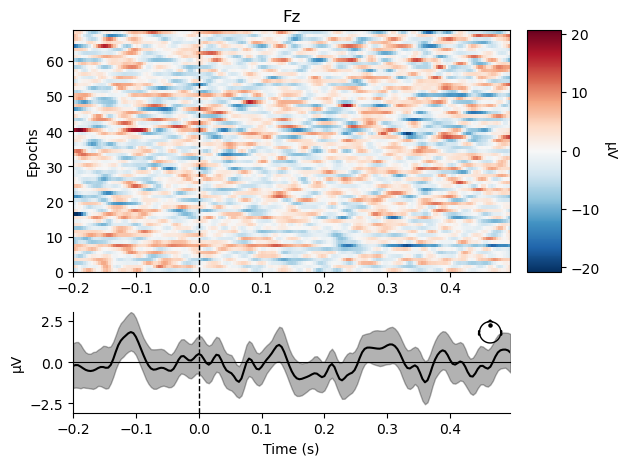

Not setting metadata
69 matching events found
No baseline correction applied
0 projection items activated


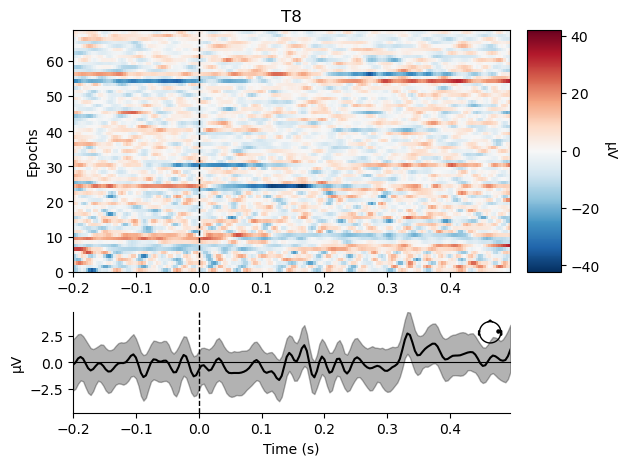

In [39]:
oddball_epochs.plot_image(picks=['Fz']);
oddball_epochs.plot_image(picks=['T8']);

In [41]:
congruent_evoked = congruent_epochs.average()
oddball_evoked = oddball_epochs.average()
Poddball_evoked = Poddball_epochs.average()

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


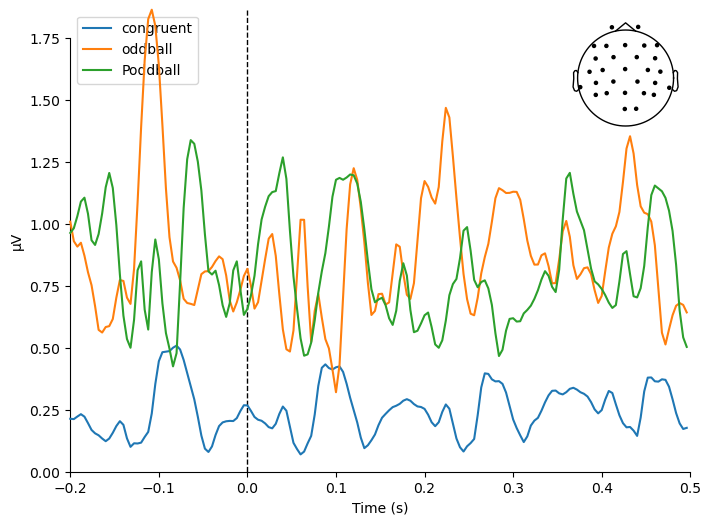

[<Figure size 800x600 with 2 Axes>]

In [42]:
mne.viz.plot_compare_evokeds(dict(congruent=congruent_evoked, oddball=oddball_evoked, Poddball=Poddball_evoked),
                             legend='upper left', show_sensors='upper right')

combining channels using "gfp"
combining channels using "gfp"


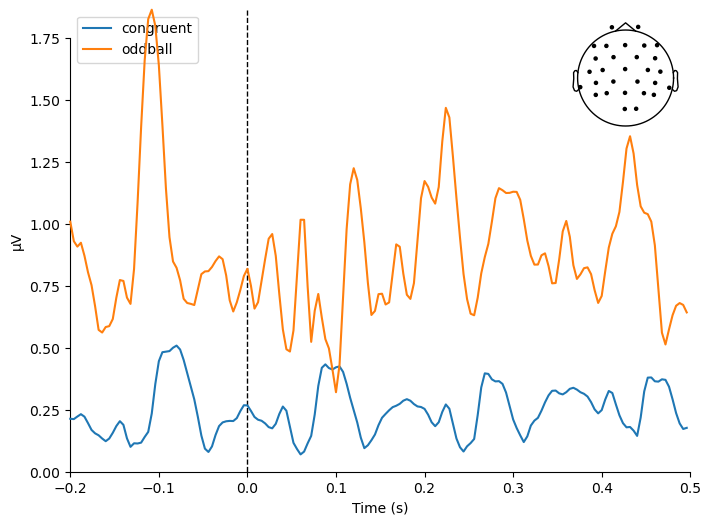

[<Figure size 800x600 with 2 Axes>]

In [43]:
mne.viz.plot_compare_evokeds(dict(congruent=congruent_evoked, oddball=oddball_evoked),
                             legend='upper left', show_sensors='upper right')

No projector specified for this dataset. Please consider the method self.add_proj.


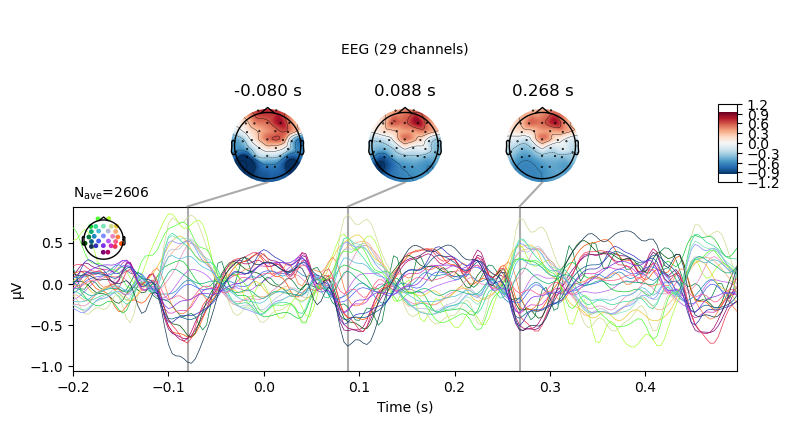

In [44]:
congruent_evoked.plot_joint(picks='eeg');

No projector specified for this dataset. Please consider the method self.add_proj.


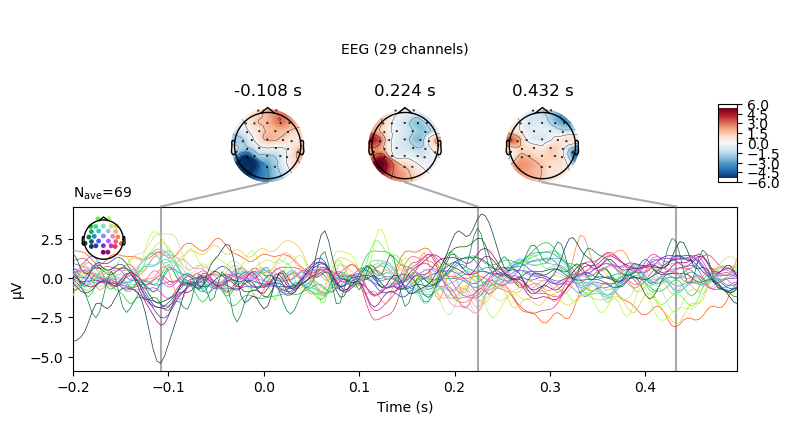

In [45]:
oddball_evoked.plot_joint(picks = "eeg");

In [56]:
# ICA ANALYSIS - DONT
import sklearn

In [85]:
# reading the file & loading in the data
raw_1 = mne.io.read_raw_brainvision('own_group4.vhdr', eog= ('EOG1', 'EOG2'))
raw_1.load_data()
raw_1.set_montage('standard_1020', on_missing = 'ignore')


# pick only EEG

# bad channels
raw_1.info['bads'] = ['O1']

raw_1.pick_types(meg=False, eeg=True, stim=True, exclude=['bads'])

# common average
raw_1.set_eeg_reference(ref_channels='average', ch_type='eeg')

raw_1.crop(25, 575)
# high-pass 
# ICA is sensitive to slow drifts, therefore we are here using a high high-pass filter! 
# Note however, that when applying the ICA, we will do it to data high-pass filtered at 0.1 Hz
# See https://mne.tools/stable/generated/mne.preprocessing.ICA.html#mne.preprocessing.ICA
raw_fit = raw_1.copy().filter(1, None)

# low-pass 
raw_fit = raw_fit.filter(None, 40)

# high and low-pass filtering for the data not used to fit the ICA
raw_1 = raw_1.filter(0.1, None)

# low-pass 
raw_1 = raw_1.filter(None, 40)

Extracting parameters from own_group4.vhdr...
Setting channel info structure...
Reading 0 ... 586859  =      0.000 ...   586.859 secs...
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 sec)



[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33001 samples (33.001 sec)



[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 sec)



[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished


In [86]:
ica = mne.preprocessing.ICA(n_components=0.95, random_state=7, max_iter=800)
ica.fit(raw_fit)

Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by explained variance: 11 components
Fitting ICA took 4.3s.


Method,fastica
Fit,21 iterations on raw data (550001 samples)
ICA components,11
Available PCA components,29
Channel types,eeg
ICA components marked for exclusion,—


In [104]:
raw_fit

<RawBrainVision | own_group4.eeg, 30 x 550001 (550.0 s), ~125.9 MB, data loaded>

In [87]:
ica.get_explained_variance_ratio(raw_fit)

{'eeg': 0.9712212298482891}

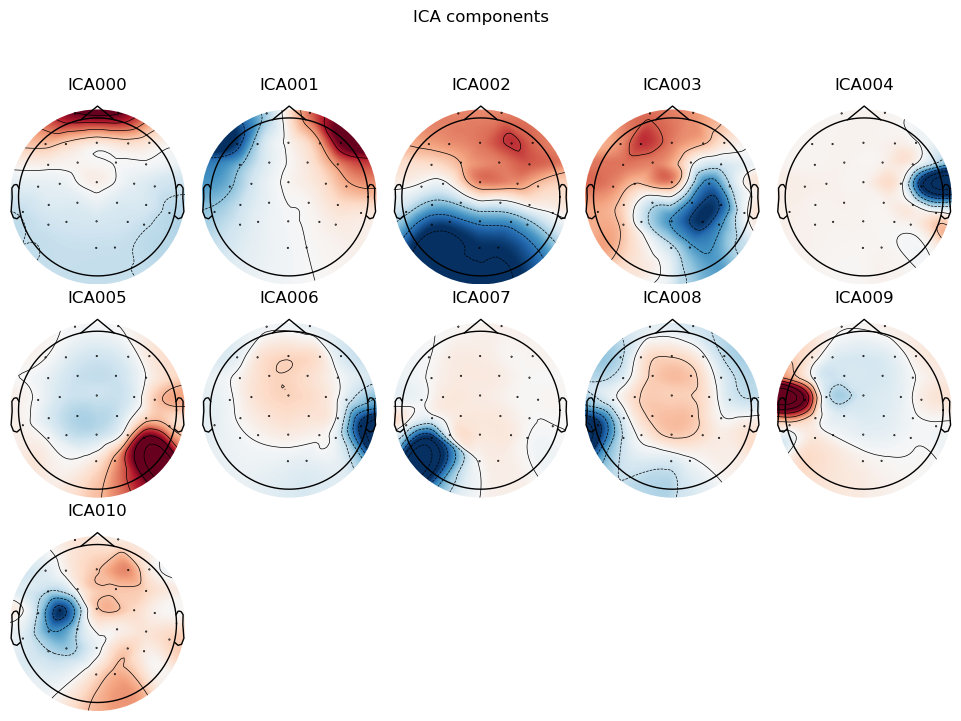

In [88]:
ica.plot_components();

Creating RawArray with float64 data, n_channels=11, n_times=550001
    Range : 25000 ... 575000 =     25.000 ...   575.000 secs
Ready.


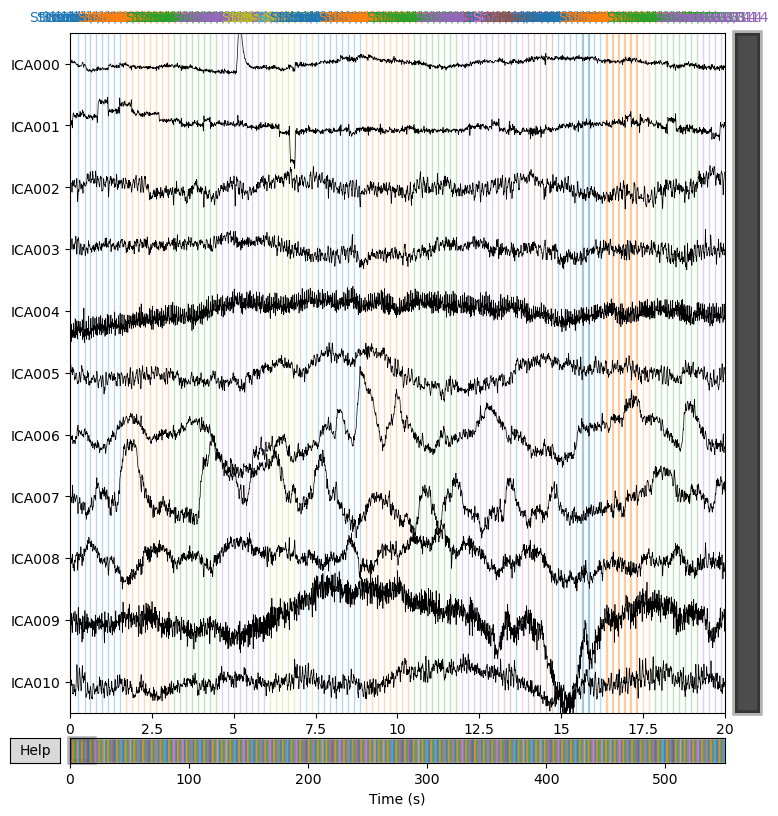

In [89]:
ica.plot_sources(raw_1);

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
275 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
275 matching events found
No baseline correction applied
0 projection items activated


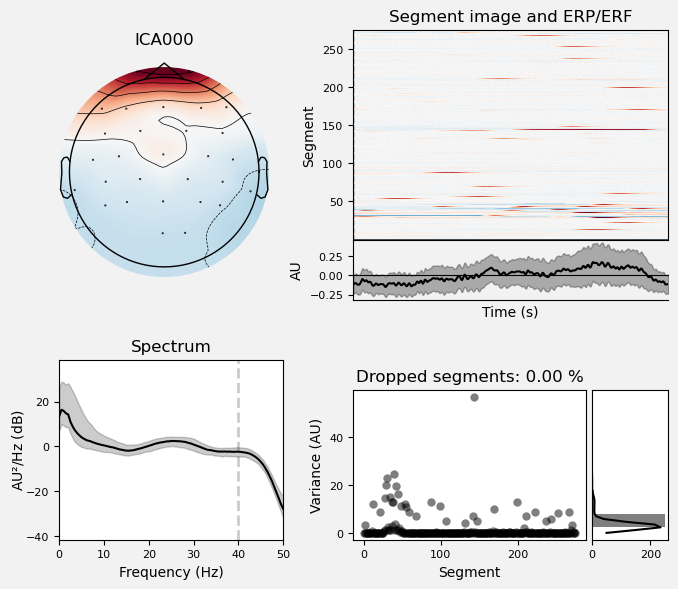

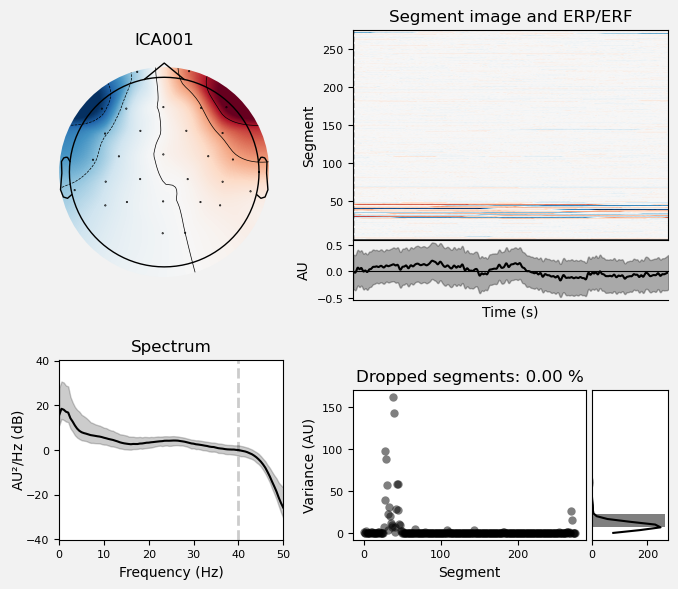

Applying ICA to Raw instance
    Transforming to ICA space (11 components)
    Zeroing out 2 ICA components
    Projecting back using 29 PCA components


<RawBrainVision | own_group4.eeg, 30 x 550001 (550.0 s), ~125.9 MB, data loaded>

In [90]:
ica.exclude = [0, 1] # setting the exclude argument to the noise components
ica.plot_properties(raw_1, picks=ica.exclude); # plotting the components that will be excluded (sanity check, did we index the right ones?)

ica.apply(raw_1)

In [97]:
ica_epochs = mne.Epochs(raw_1, events, event_id, tmin, tmax, picks=picks, baseline=(0, 0), preload=True)


Not setting metadata
2999 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2999 events and 251 original time points ...
1 bad epochs dropped


In [98]:
ica_epochs_resampled = ica_epochs.resample(250)

In [99]:
ica.get_explained_variance_ratio(raw_1)

{'eeg': 0.8657741189224734}

In [100]:
ica_epochs_congruent = ica_epochs['congruent']
ica_epochs_oddball = ica_epochs['oddball']

combining channels using "gfp"
combining channels using "gfp"


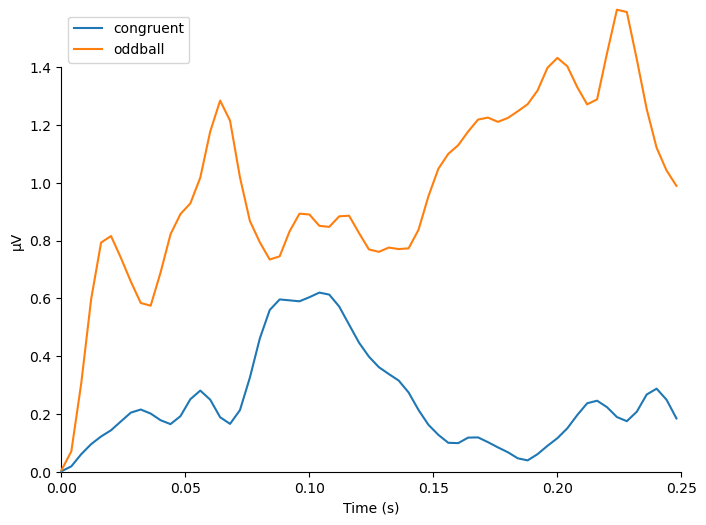

[<Figure size 800x600 with 1 Axes>]

In [101]:
ica_evoked_congruent = ica_epochs_congruent.average()
ica_evoked_oddball = ica_epochs_oddball.average()

mne.viz.plot_compare_evokeds(dict(congruent=ica_evoked_congruent, oddball=ica_evoked_oddball))

No projector specified for this dataset. Please consider the method self.add_proj.


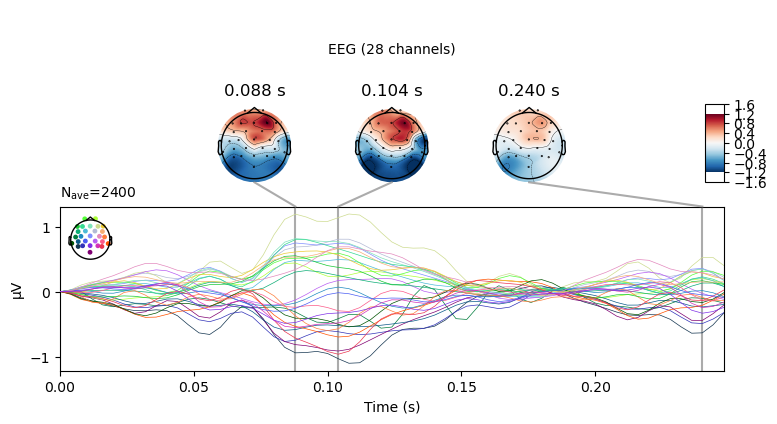

In [102]:
ica_evoked_congruent.plot_joint(picks='eeg');

No projector specified for this dataset. Please consider the method self.add_proj.


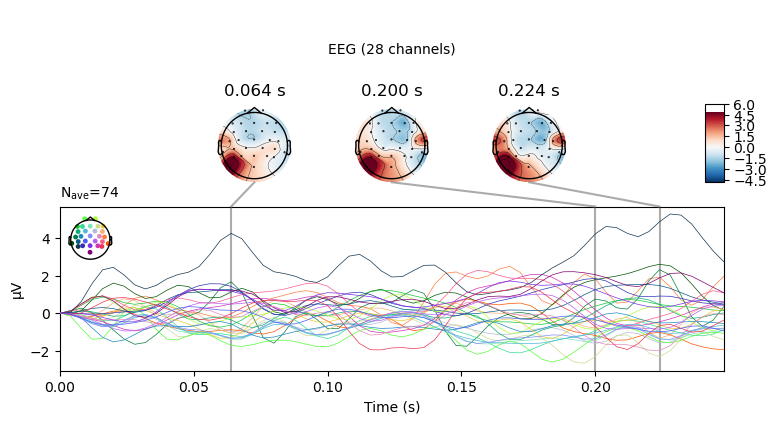

In [103]:
ica_evoked_oddball.plot_joint(picks='eeg');